In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
from collections import defaultdict
DT_int = 14
today = pd.to_datetime('today').date()
yday = today - timedelta(days=1)
begin_day = datetime.datetime.strptime('2020-01-01', '%Y-%m-%d').date()
DT = timedelta(days=DT_int)
Z=20
NCI_max = 20
PPT_max = 5

In [8]:
cols = ['date', 'new_cases_per_million', 'new_cases', 'new_tests', 'population', 'continent', 'location']
col_types = defaultdict(int)
col_types['continent'] = 'str'
col_types['location'] = 'str'
covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", usecols=cols, dtype=col_types, parse_dates=['date'], index_col='date')

In [40]:
europe = covid[covid.continent=='Europe'].drop(['continent'], axis=1)

In [41]:
def calc_nci(df, dt_nci=DT_int):
    nci = df.loc[:,'new_cases_per_million'].rolling(dt_nci).sum()/10
    return nci

def calc_ppt(df, dt_ppt=DT_int):
    ppt = (df.loc[:,'new_cases'].divide(df.loc[:,'new_tests'])*100).rolling(dt_ppt).mean()
    return ppt

def calc_rsi(df, Sn, Ln):
    rsi = df.loc[:,'new_cases'].rolling(Sn).sum().divide(df.loc[:,'new_cases'].rolling(Ln).sum())
    return rsi

In [80]:
countries = europe.location.sort_values().unique()
dfs = []
for country in countries:
    df = europe.loc[europe.location == country,:].copy()
    if country == 'Italy':
        df = df.shift(-1)
    df['NCI'] = calc_nci(df)
    df['PPT'] = calc_ppt(df)
    df['RSI'] = calc_rsi(df, Sn=3, Ln=14)
    dfs.append(df)
covid = pd.concat(dfs)

In [81]:
country = 'Italy'
data = covid[covid.location == country]

In [82]:
data.tail()

,location,new_cases,new_cases_per_million,new_tests,population,NCI,PPT,RSI
date,,,,,,,,
2020-08-04,Italy,190.0,3.142,29739.0,60461828.0,6.0649,1.010237,0.160076
2020-08-05,Italy,384.0,6.351,32169.0,60461828.0,6.2369,1.034928,0.194378
2020-08-06,Italy,401.0,6.632,NaN,60461828.0,6.3940,NaN,0.252199
2020-08-07,Italy,552.0,9.130,NaN,60461828.0,6.8902,NaN,0.320931
2020-08-08,Italy,347.0,5.739,NaN,60461828.0,7.0109,NaN,0.306676


In [83]:
date_ini = '2020-01-01'
dates = pd.date_range(date_ini, yday, periods=10)
dates_mini = pd.date_range(date_ini, yday, periods=19)
dateticks = [t.strftime('%b-%d') for t in dates]
data_keep = data.loc[data.index>date_ini]

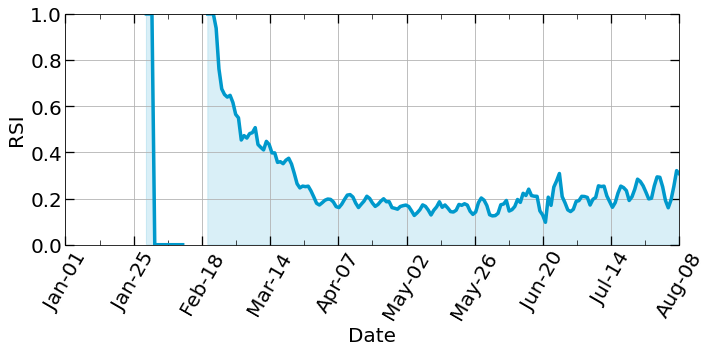

In [134]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.tick_params('both', which='both', labelsize=Z, top=True, right=True, direction='in')
ax.tick_params('both', which='major', length=9, width=1.3)
ax.tick_params('both', which='minor', length=5, width=0.7)
ax.set_xlabel('Date', fontsize=Z)
ax.set_ylabel('RSI', fontsize=Z)
ax.set_xticks(dates)
ax.set_xticks(dates_mini, minor=True)
ax.set_xticklabels(dateticks, rotation=60)
ax.set_xlim((dates[0], dates[-1]))
ax.set_ylim(0, 1)
ax.fill_between(data_keep.index, 0, data_keep.RSI, alpha=0.15, color=(0.,0.6,0.8))
ax.errorbar(data_keep.index, data_keep.RSI, lw=3.5, c=(0.,0.6,0.8))#, label="2-week\nmoving average")
ax.grid()

plt.tight_layout()
plt.savefig("RSI.png", format='png', dpi=300)

plt.show()

In [91]:
print(data.tail())

           location  new_cases  new_cases_per_million  new_tests  population  \
date                                                                           
2020-08-04    Italy      190.0                  3.142    29739.0  60461828.0   
2020-08-05    Italy      384.0                  6.351    32169.0  60461828.0   
2020-08-06    Italy      401.0                  6.632        NaN  60461828.0   
2020-08-07    Italy      552.0                  9.130        NaN  60461828.0   
2020-08-08    Italy      347.0                  5.739        NaN  60461828.0   

               NCI       PPT       RSI  
date                                    
2020-08-04  6.0649  1.010237  0.160076  
2020-08-05  6.2369  1.034928  0.194378  
2020-08-06  6.3940       NaN  0.252199  
2020-08-07  6.8902       NaN  0.320931  
2020-08-08  7.0109       NaN  0.306676  


In [97]:
def get_latest(df):
    return df.loc[df.index.max()]

In [98]:
yday_rsi = covid.groupby('location').apply(get_latest).loc[:,['RSI']]

In [117]:
yday_rsi = yday_rsi.loc[yday_rsi.RSI.notna()]
yday_rsi

,RSI
location,
Albania,0.235653
Andorra,0.288136
Austria,0.226986
Belarus,0.208525
Belgium,0.087431
Bosnia and Herzegovina,0.218035
Bulgaria,0.306500
Croatia,0.222370
Cyprus,0.294444


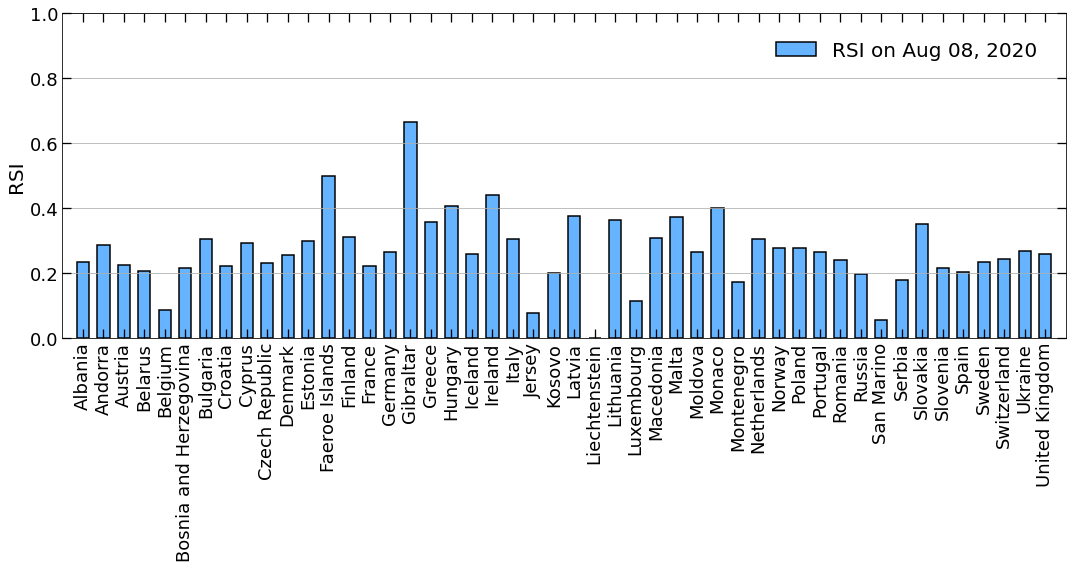

In [144]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.tick_params('both', which='both', labelsize=Z-2, top=True, right=True, direction='in')
ax.tick_params('both', which='major', length=9, width=1.3)
ax.tick_params('both', which='minor', length=5, width=0.7)
#ax.set_xlabel('Country', fontsize=Z)
ax.set_ylabel('RSI', fontsize=Z)
#ax.set_xticks(dates)
#ax.set_xticks(dates_mini, minor=True)
ax.set_xticklabels(yday_rsi.index, rotation=90)
ax.set_xlim(-1, len(yday_rsi))
ax.set_ylim(0, 1)
ax.bar(yday_rsi.index, yday_rsi.RSI, width=0.6, color=(0.4,0.7,1), lw=1.5, edgecolor='k', label="RSI on {}".format(yday.strftime('%b %d, %Y')))

ax.yaxis.grid()
ax.legend(fontsize=Z, borderaxespad=1, frameon=False)

plt.tight_layout()
#plt.savefig("RSI.png", format='png', dpi=300)

plt.show()